# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

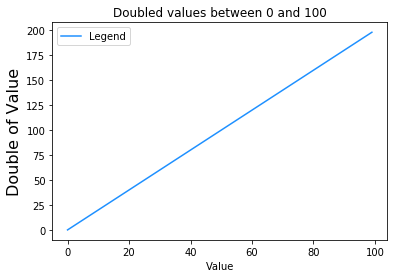

In [3]:
# OPTION 1
# Create a figure of a fixed size
plt.figure()
x = np.arange(0,100)
y = x*2
plt.plot(x,y,'dodgerblue', label='Legend')
plt.legend()
plt.title('Doubled values between 0 and 100')
plt.xlabel('Value')
plt.ylabel('Double of Value', fontsize=16)
plt.show()
# First plot
# Second plot
# Show the plot

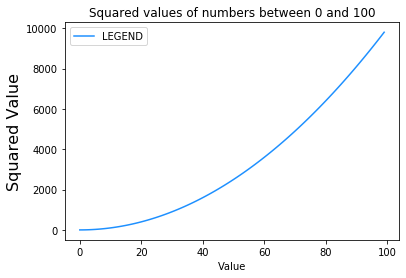

In [4]:
plt.figure()
x = np.arange(0,100)
y = x**2
plt.plot(x,y,'dodgerblue', label='LEGEND')
plt.legend()
plt.title('Squared values of numbers between 0 and 100')
plt.xlabel('Value')
plt.ylabel('Squared Value', fontsize=16)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

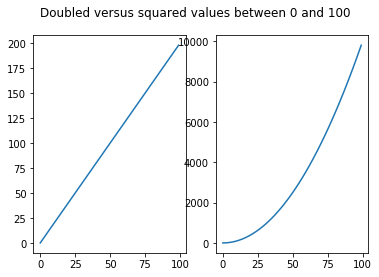

In [5]:
# OPTION 2

# Create a figure of a fixed size and axes
# Plots
# Show the plot
x = np.arange(0,100)
y = x*2
z = x**2
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Doubled versus squared values between 0 and 100')
axs[0].plot(x, y)
axs[1].plot(x, z)


#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

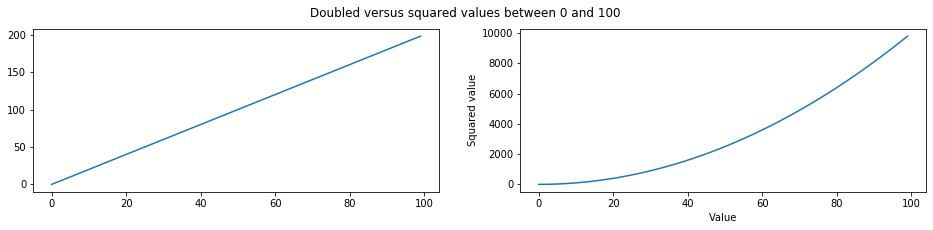

In [6]:
# ENHANCED VERSION to see more matplotlib features

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 90 # ylabel rotation

# Create a figure of a fixed size and axes
# First plot adding a title and x and y labels
# Second plot adding a title and x and y labels
# Show the plot

x = np.arange(0,100)
y = x*2
z = x**2
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(fs, lw))
fig.suptitle('Doubled versus squared values between 0 and 100')
plt.ylabel('Squared value', rotation=y_rot)
plt.xlabel('Value', rotation=0)
axs[0].plot(x, y)
axs[1].plot(x, z)

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

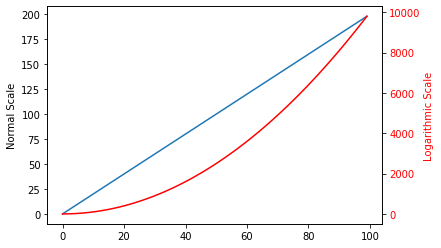

In [7]:
# Create a figure of a fixed size and axes

x = np.arange(0,100)
y1 = x*2
y2 = x**2
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('Normal Scale')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Logarithmic Scale', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
# Normal plot
# Logarithmic scale
# Show plot

In [8]:
# ALTERNATIVE WITH LEGEND
# Create a figure of a fixed size and axes
# Normal plot
# Logarithmic scale
# Show plot

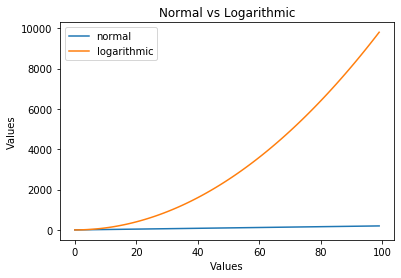

In [9]:
import numpy as np
x1 = np.arange(0,100)
y1 = x*2
y2 = x**2
plt.plot(x1, y1, label='normal')
plt.plot(x1, y2, label='logarithmic')

plt.xlabel('Values')
plt.ylabel('Values')

plt.title("Normal vs Logarithmic")
plt.legend()
plt.show()
#paolo: I refer you to my comments on slack relative to this
# plot. You should plot both lines first on one subplot in linear scale
# and then on another subplot on log scale. Please ask me again if it is not clear.


# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [10]:
# Read the data
data = pd.read_csv('data/Fitbit2.csv')
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

In [11]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
data1=data.groupby(["Months_encoded"]).agg('mean').reset_index()

steps_monthly=data1[["Months_encoded","Steps"]]
# Create a figure of a fixed size and axes
# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
# Plot the weekday steps in the current axes
# Add labels, title, etc
# Save the figure

# MEDIAN STEPS BY WORK_OR_WEEKEND
data2=data.groupby(["Work_or_Weekend"]).agg('mean').reset_index()
steps_weekly=data2[["Work_or_Weekend","Steps"]]
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
# Find the median steps for workdays and weekdays
# Plot the workday and weekend steps in the current axes
# Add labels, title, etc
# Save the figure

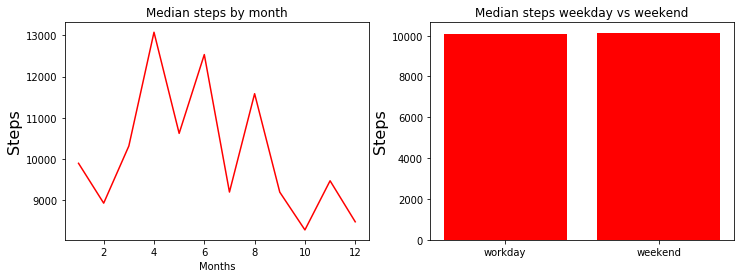

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
x=steps_monthly['Months_encoded']
y=steps_monthly['Steps']
ax[0].plot(x,y, color='red', label='Legend')
ax[0].set_title('Median steps by month')
ax[0].set_xlabel('Months')
ax[0].set_ylabel('Steps', fontsize=16)

x1=steps_weekly["Work_or_Weekend"]
y1=steps_weekly['Steps']
ax[1].bar(x1,y1, color='red', label='Legend')
ax[1].set_title('Median steps weekday vs weekend')
ax[1].set_ylabel('Steps', fontsize=16)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['workday','weekend'])
plt.show()
#paolo: nice plot, brava! and well labelled

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

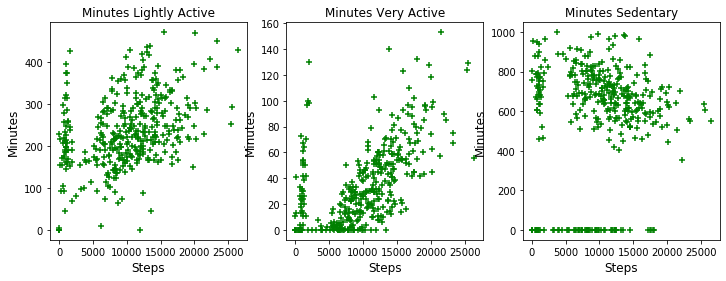

In [13]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 
data3=data[["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary","Steps"]]
data3
# Create a figure of a fixed size and axes
# Iterate to draw each scatter plot
fig, ax = plt.subplots(1,3,figsize=(12,4))
for i in range(0,len(data3.columns)-1):
    ax[i].scatter(data3["Steps"],data3.iloc[:,i],c="g",marker="+")
    ax[i].set_title(data3.columns[i],size=12)
    ax[i].set_xlabel("Steps",size=12)
    ax[i].set_ylabel("Minutes",size=12)

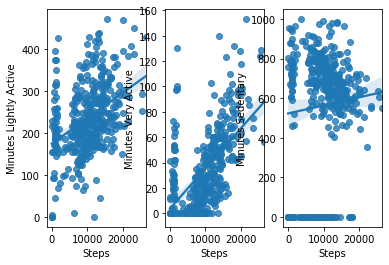

In [14]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 
data3=data[["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary","Steps"]]
data3

# Create a figure of a fixed size and axes

fig, axs = plt.subplots(ncols=3)
sns.regplot(x='Steps', y='Minutes Lightly Active', data=data3, ax=axs[0])
sns.regplot(x='Steps', y='Minutes Very Active', data=data3, ax=axs[1])
sns.regplot(x='Steps',y='Minutes Sedentary', data=data3, ax=axs[2])
# Iterate to draw each scatter plot
#paolo: ok, maybe better to play with plot dimension because it is not well visible